### Analyse de Données et Web Scraping: le Championnat d'Angleterre de Football 2019

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as chromeService
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
driver = webdriver.Chrome(service=chromeService(ChromeDriverManager().install()))

In [4]:
url = 'https://www.premierleague.com/tables'
driver.get(url)

In [5]:
from bs4 import BeautifulSoup

In [41]:
# pour recuperer la 1ere page html
soup = BeautifulSoup(driver.page_source,"html.parser")

In [42]:
# au niveau de cette page afficher les tr qui s'y trouvent
tables = soup.find_all("tr")
tables

[<tr> <th class="league-table__pos-header" scope="col"> <div class="league-table__thFull thFull">Position</div> <div class="league-table__thShort thShort"></div> </th> <th class="league-table__team-header" scope="col">Club</th> <th scope="col"> <div class="league-table__thFull thFull">Played</div> <div class="league-table__thShort thShort">Pl</div> </th> <th scope="col"> <div class="league-table__thFull thFull">Won</div> <div class="league-table__thShort thShort">W</div> </th> <th scope="col"> <div class="league-table__thFull thFull">Drawn</div> <div class="league-table__thShort thShort">D</div> </th> <th scope="col"> <div class="league-table__thFull thFull">Lost</div> <div class="league-table__thShort thShort">L</div> </th> <th class="hideSmall" scope="col"><abbr title="Goals For">GF</abbr></th> <th class="hideSmall" scope="col"><abbr title="Goals Against">GA</abbr></th> <th scope="col"><abbr title="Goal Difference">GD</abbr></th> <th class="points" scope="col"> <div class="league-tab

In [43]:
tables[0]

<tr> <th class="league-table__pos-header" scope="col"> <div class="league-table__thFull thFull">Position</div> <div class="league-table__thShort thShort"></div> </th> <th class="league-table__team-header" scope="col">Club</th> <th scope="col"> <div class="league-table__thFull thFull">Played</div> <div class="league-table__thShort thShort">Pl</div> </th> <th scope="col"> <div class="league-table__thFull thFull">Won</div> <div class="league-table__thShort thShort">W</div> </th> <th scope="col"> <div class="league-table__thFull thFull">Drawn</div> <div class="league-table__thShort thShort">D</div> </th> <th scope="col"> <div class="league-table__thFull thFull">Lost</div> <div class="league-table__thShort thShort">L</div> </th> <th class="hideSmall" scope="col"><abbr title="Goals For">GF</abbr></th> <th class="hideSmall" scope="col"><abbr title="Goals Against">GA</abbr></th> <th scope="col"><abbr title="Goal Difference">GD</abbr></th> <th class="points" scope="col"> <div class="league-tabl

In [44]:
for i in tables[0].findAll("th"):
    print (i.text)

 Position  
Club
 Played Pl 
 Won W 
 Drawn D 
 Lost L 
GF
GA
GD
 Points Pts 
Form
More


In [45]:
columns=[]
for header in tables[0].findAll("th"):
    columns.append(header.text)
columns

[' Position  ',
 'Club',
 ' Played Pl ',
 ' Won W ',
 ' Drawn D ',
 ' Lost L ',
 'GF',
 'GA',
 'GD',
 ' Points Pts ',
 'Form',
 'More']

## *************************************************************************

In [46]:
tab = []
for i in tables[1].find_all('td'):
    print(i)
    tab.append(i.text)
print(tab)

<td class="league-table__pos pos button-tooltip" id="Tooltip" tabindex="0"> <span class="league-table__value value">1</span> <span class="league-table__movement none"> <span class="league-table__tooltip-container tooltipContainer tooltip-left" role="tooltip"> <span class="league-table__tooltip-content tooltip-content">Previous Position <span class="league-table__result-highlight">1 </span> </span> </span> </span> </td>
<td class="league-table__team team" scope="row"> <a href="//www.premierleague.com/clubs/10/Liverpool/overview"> <span class="badge badge-image-container" data-size="50" data-widget="club-badge-image"> <img class="badge-image badge-image--32 js-badge-image" src="https://resources.premierleague.com/premierleague/badges/rb/t14.svg" srcset="https://resources.premierleague.com/premierleague/badges/rb/t14.svg, https://resources.premierleague.com/premierleague/badges/rb/t14.svg 2x"/> </span> <span class="league-table__team-name league-table__team-name--long long">Liverpool</spa

In [49]:
tabs = []
for i in range(len(tables)):
    team = []
    for  j in tables[i].find_all('td'):
        team.append(j.text)
    tabs.append(team)
print(tabs)

[[], [' 1   Previous Position 1     ', '     Liverpool LIV  ', '19', '18', '1', '0', '52', '16', '36', '55', '   W    Wednesday 8 July 2020    BHA       1-3       LIV          D    Saturday 11 July 2020    LIV       1-1       BUR          L    Wednesday 15 July 2020    ARS       2-1       LIV          W    Wednesday 22 July 2020    LIV       5-3       CHE          W    Sunday 26 July 2020    NEW       1-3       LIV          ', '      '], ['      Liverpool    Latest Result: Sunday 26 July 2020   NEW      1-3      LIV       Visit Club Page        Compare against another team    '], [' 2   Previous Position 2     ', '     Manchester City MCI  ', '19', '15', '2', '2', '57', '13', '44', '47', '   W    Wednesday 8 July 2020    MCI       5-0       NEW          W    Saturday 11 July 2020    BHA       0-5       MCI          W    Wednesday 15 July 2020    MCI       2-1       BOU          W    Tuesday 21 July 2020    WAT       0-4       MCI          W    Sunday 26 July 2020    MCI       5-0      

In [50]:
tabs = pd.DataFrame(tabs,columns=columns)
tabs

,Position,Club,Played Pl,Won W,Drawn D,Lost L,GF,GA,GD,Points Pts,Form,More
0,None,None,None,None,None,None,None,None,None,None,None,None
1,1 Previous Position 1,Liverpool LIV,19,18,1,0,52,16,36,55,W Wednesday 8 July 2020 BHA 1-3...,
2,Liverpool Latest Result: Sunday 26 Ju...,None,None,None,None,None,None,None,None,None,None,None
3,2 Previous Position 2,Manchester City MCI,19,15,2,2,57,13,44,47,W Wednesday 8 July 2020 MCI 5-0...,
4,Manchester City Latest Result: Sunday...,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
143,\n\n\n\n\n\nReading\n\n\n\nRecent Result: Satu...,None,None,None,None,None,None,None,None,None,None,None
144,\n12\n,\n\n\n\n\n\n\n\nSouthampton\nSOU\n\n,6,1,1,4,7,19,\n -12\n\n,4,\n\nL\n\n\n\nSaturday 19 August 2023\n\n\nSOU\...,\n\n\n\n\nWest Ham United U18\n\n\n\n\n\nSatur...
145,\n\n\n\n\n\nSouthampton\n\n\n\nRecent Result: ...,None,None,None,None,None,None,None,None,None,None,None
146,\n13\n,\n\n\n\n\n\n\n\nNorwich City\nNOR\n\n,6,0,0,6,8,20,\n -12\n\n,0,\n\nL\n\n\n\nSaturday 19 August 2023\n\n\nRDG\...,\n\n\n\n\nTottenham Hotspur U18\n\n\n\n\n\nSat...


## *************************************************************************

In [29]:
values = tables[1].findAll("td")

In [30]:
position=values[0].text
club=values[1].text
player=values[2].next
won=values[3].text
drawn=values[4].text
lost=values[5].text
gf=values[6].text
ga=values[7].text
gd=values[8].text
points=values[9].text

In [31]:
tab_PL=[position.strip(),club.strip(),player.strip(),won.strip(),drawn.strip(),lost.strip(),gf.strip(),ga.strip(),gd.strip(),points.strip()]

In [32]:
tab_PL

['1   Previous Position 6',
 'Aston Villa AVL',
 '3',
 '3',
 '0',
 '0',
 '13',
 '2',
 '11',
 '9']

In [34]:
len(tables)

148

In [35]:
tab_PL=[]
while (True):
    soup = BeautifulSoup(driver.page_source,'html.parser')
    tables = soup.find_all('tr')
    for i in range(1, len(tables)):
        values = tables[i].findAll("td")
        position=values[0].text
        club=values[1].text
        player=values[2].next
        won=values[3].text
        drawn=values[4].text
        lost=values[5].text
        gf=values[6].text
        ga=values[7].text
        gd=values[8].text
        points=values[9].text
        tab_PL.append([position,club,player,won,drawn,lost,gf,ga,gd,points])
    suivant_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".paginationNextContainer")))
    suivant_button.click()
    if "inactive" in suivant_button.get_attribute("class"):
        break

IndexError: list index out of range

In [10]:
tab_PL=[]
while (True):
    soup = BeautifulSoup(driver.page_source,'html.parser')
    tables = soup.find_all('tr')
    for i in range(1,3):
        values = tables[i].findAll("td")
        club=values[1].text
        player=values[2].next
        tab_PL.append([club,player])
    suivant_button = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".paginationNextContainer")))
    suivant_button.click()
    if "inactive" in suivant_button.get_attribute("class"):
        break

IndexError: list index out of range

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_chelsea_2019_2020 = pd.read_csv("df_matches_Chelsea_PL_2019_2020.csv", index_col=0)

In [3]:
df_chelsea_resultat=df_chelsea_2019_2020.groupby(['Team','Result'])['Result'].count().rename('nbr_matchs').reset_index()
df_chelsea_resultat

,Team,Result,nbr_matchs
0,Chelsea,D,6
1,Chelsea,L,12
2,Chelsea,W,20


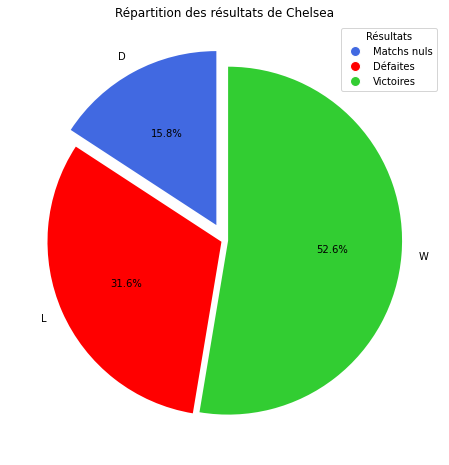

In [9]:
# Données
labels = df_chelsea_resultat['Result']
data = df_chelsea_resultat['nbr_matchs']

# Couleurs significatives
colors = {'W': 'limegreen', 'L': 'red', 'D': 'royalblue'}

# Explosion
explode = [0.1, 0.02, 0.02]
#explode=(0, 0.15, 0 )

# Créer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=[colors[r] for r in labels], explode=explode)

# Titre
plt.title('Répartition des résultats de Chelsea')

# Légende explicative
legend_labels = {'W': 'Victoires', 'L': 'Défaites', 'D': 'Matchs nuls'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[result], 
                             markersize=10, markerfacecolor=colors[result]) for result in labels]

plt.legend(handles=legend_handles, title='Résultats', loc='upper right')

# Afficher le diagramme
plt.show()
